In [1]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Генерируем выборки

In [2]:
N = 1000
M = 100
theta1 = 1
theta2 = 10
theta3 = 1000
samples1 = [sps.uniform.rvs(0, theta1, N) for i in range(M)]
samples2 = [sps.uniform.rvs(0, theta2, N) for i in range(M)]
samples3 = [sps.uniform.rvs(0, theta3, N) for i in range(M)]

Создаём список оценок
$$\hat{\theta}_0 = (n + 1) X_{(1)}$$
$$\hat{\theta}_1 = 2\overline{X}$$
$$\hat{\theta}_2 = X_{(1)} +  X_{(n)}$$
$$\hat{\theta}_3 = \frac{n + 1}{n}X_{(n)}$$

In [3]:
class Estimator:
    def __init__(self, function, tex_description):
        self.function = function
        self.tex_description = tex_description
        
theta_hat = [
    Estimator(
        lambda sample:
            (len(sample) + 1) * sample.min(),
        r"$(n + 1) X_{(1)}$"),
    Estimator(
        lambda sample:
            2 * sample.mean(),
        r"$2\overline{X}$"),
    Estimator(
        lambda sample:
            sample.min() + sample.max(),
        r"$X_{(1)} +  X_{(n)}$"),
    Estimator(
        lambda sample: 
            (len(sample) + 1) / len(sample) * sample.max(),
        r"$\frac{n + 1}{n}X_{(n)}$")]

Пишем функцию подсчёта усреднённого квадратичного отклонения.

In [4]:
def calculate_mean_loss(estimator, theta, samples):
    ans = []
    for prefix_len in range(1, N):
        mean_loss = 0
        for sample in samples:
            mean_loss += pow(theta - estimator.function(sample[:prefix_len]), 2)
        mean_loss /= len(samples)
        ans.append(mean_loss)
    return ans

Пишем функцию, которая рисует графики.

In [5]:
def draw_plot(estimators, theta, samples, plot_height):
    plt.figure(figsize=(12, 5)).suptitle("loss function for theta = "
                                         + str(theta), fontsize=14)
    plt.rc('text', usetex=True)
    for estimator in estimators:
        loss = calculate_mean_loss(estimator, theta, samples)
        plt.plot(loss,label=estimator.tex_description)
        plt.axis([0, N, 0, plot_height])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

Теперь можно рисовать графики. Для каждой $\theta$ я буду рисовать несколько графиков в разных масштабах, потому что порядок значений функции потерь сильно колеблется от выбора оценки.

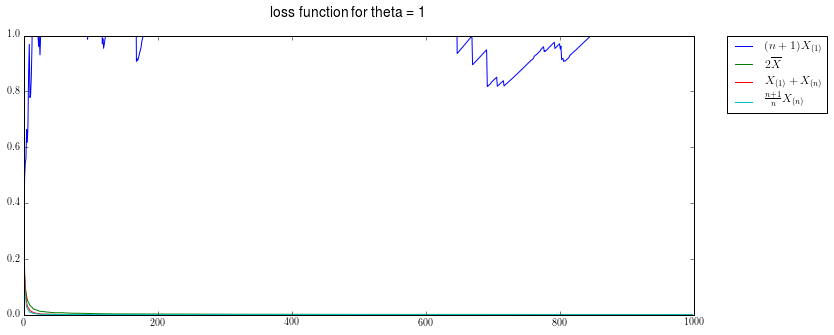

In [6]:
draw_plot(theta_hat, theta1, samples1, theta1 * theta1)

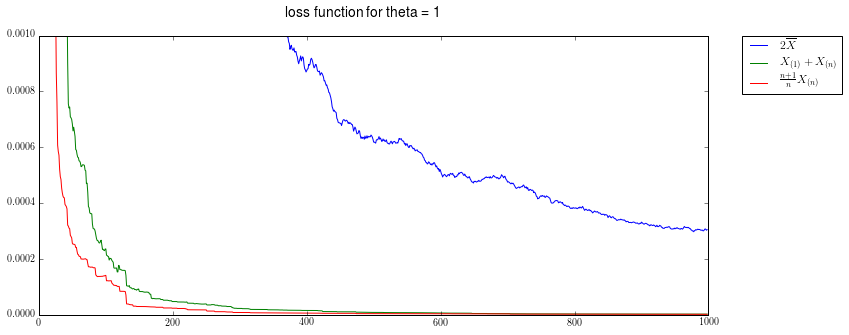

In [7]:
draw_plot(theta_hat[1:], theta1, samples1, theta1 / 1000)

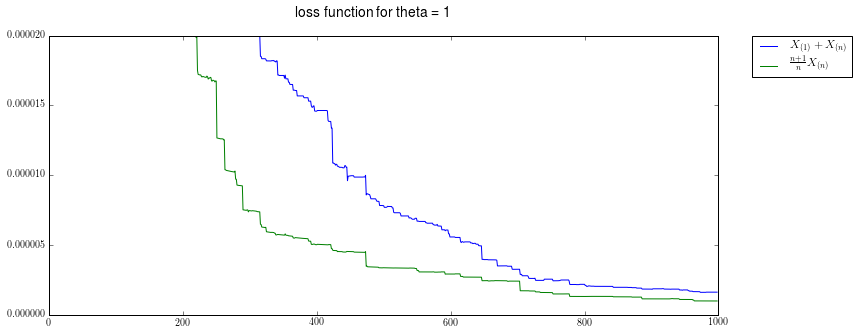

In [8]:
draw_plot(theta_hat[2:], theta1, samples1, theta1 / 50000)

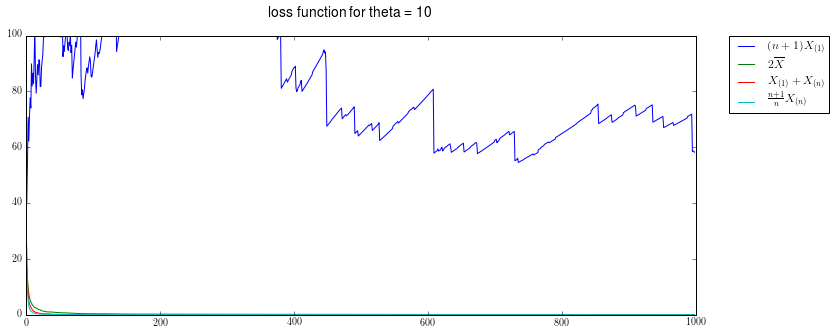

In [9]:
draw_plot(theta_hat, theta2, samples2, theta2 * theta2)

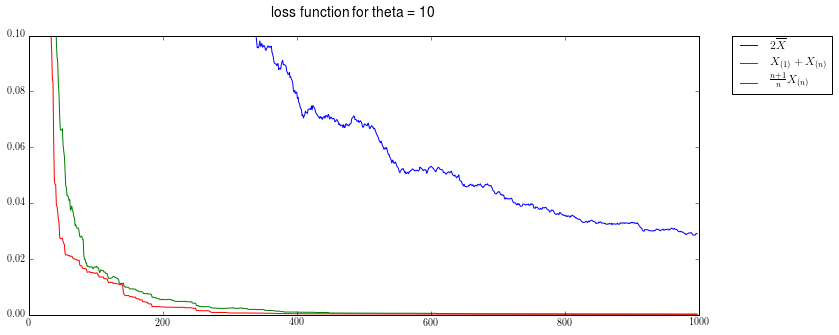

In [10]:
draw_plot(theta_hat[1:], theta2, samples2, theta2 / 100)

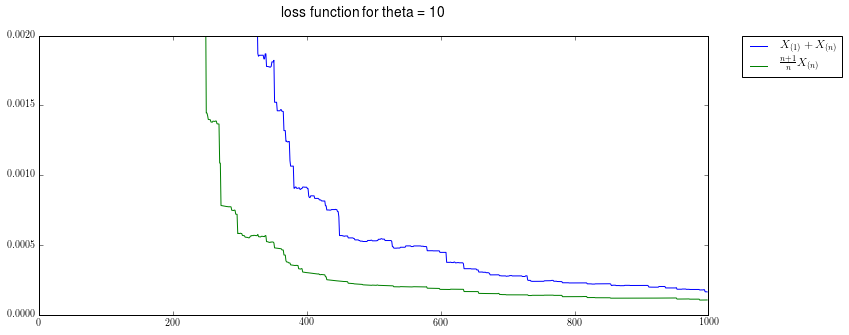

In [11]:
draw_plot(theta_hat[2:], theta2, samples2, theta2 / 5000)

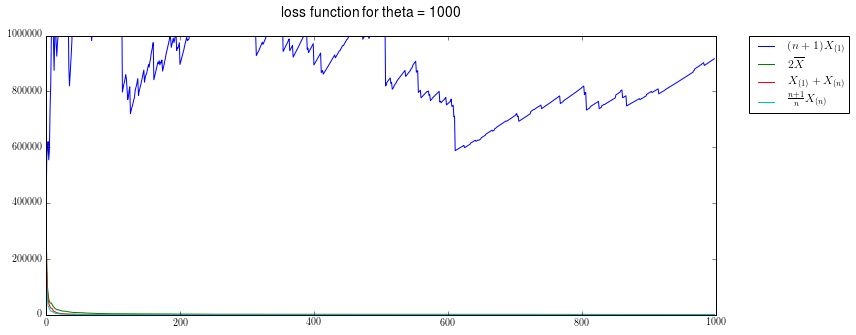

In [12]:
draw_plot(theta_hat, theta3, samples3, theta3 * theta3)

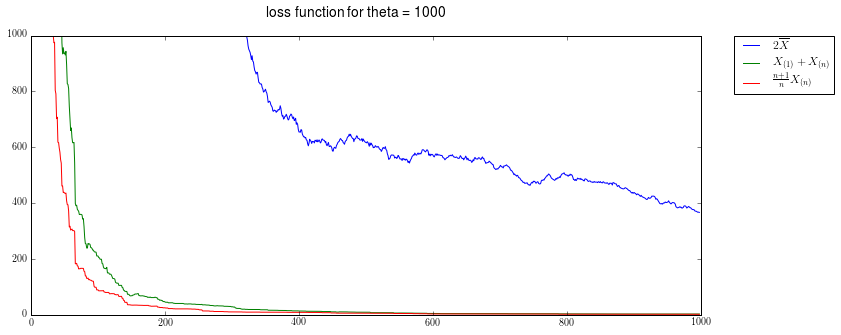

In [13]:
draw_plot(theta_hat[1:], theta3, samples3, theta3)

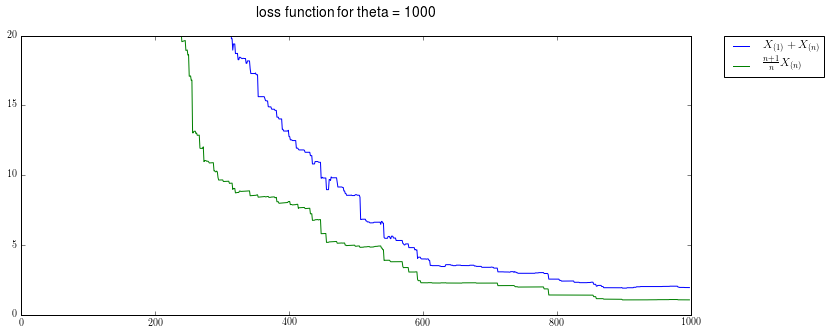

In [14]:
draw_plot(theta_hat[2:], theta3, samples3, theta3 / 50)

Из графиков можно сделать вывод, что оценка $(n + 1)X_{(1)}$ очень плоха в среднеквадратичном смысле. Оценка $2\overline{X}$ вторая с конца. Оценка $X_{(1)} +  X_{(n)}$ занимает второе место в среднеквадратичном смысле, а оценка $\frac{n + 1}{n}X_{(n)}$ — лучшая.

Кстати, в аналогичной задаче 2.1, которая отличается от этой только функцией потерь (модуль разности вместо усреднённого квадратичного отклонения), порядок «от плохой оценки к хорошей» был такой же, только не удавалось различить оценки $X_{(1)} +  X_{(n)}$ и $\frac{n + 1}{n}X_{(n)}$. В этой же задаче оценка $\frac{n + 1}{n}X_{(n)}$ однозначно показала себя лучшей.